# Model Summary: Predicting Income Level (>50K or <=50K)

## Dataset Overview
The dataset, derived from the 1994 Census bureau database, includes 32,560 samples with 15 columns. The task is to predict whether an individual earns more than 50K per year based on features like age, work class, education, marital status, occupation, and more. The dataset contains both categorical and numerical features, which require preprocessing before model building.

### Features:
1. **Age** (Numerical)
2. **Workclass** (Categorical)
3. **Fnlwgt** (Numerical)
4. **Education** (Categorical)
5. **Education_num** (Numerical)
6. **Marital_status** (Categorical)
7. **Occupation** (Categorical)
8. **Relationship** (Categorical)
9. **Race** (Categorical)
10. **Sex** (Categorical)
11. **Capital_gain** (Numerical)
12. **Capital_loss** (Numerical)
13. **Hours_per_week** (Numerical)
14. **Native_country** (Categorical)
15. **Income** (Target Variable: >50K or <=50K)

## Models Evaluated

### 1. **Logistic Regression**
   - **Accuracy**: 82.23%
   - **Precision**: 70.75%
   - **Recall**: 45.76%
   - **F1-Score**: 55.58%
   - **Confusion Matrix**: 
     - True Positives: 1086, False Negatives: 1287
     - True Negatives: 6946, False Positives: 449

   **Conclusion**: Logistic regression showed moderate accuracy but suffered from a low recall, indicating that it struggles to correctly identify individuals earning >50K.

### 2. **Decision Tree Classifier**
   - **Accuracy**: 81.12%
   - **Precision**: 60.93%
   - **Recall**: 62.11%
   - **F1-Score**: 61.51%
   - **Confusion Matrix**: 
     - True Positives: 1474, False Negatives: 899
     - True Negatives: 6450, False Positives: 945

   **Conclusion**: The decision tree model improved recall over logistic regression, but at the cost of reduced precision, meaning more false positives.

### 3. **Random Forest Classifier**
   - **Accuracy**: 85.91%
   - **Precision**: 75.16%
   - **Recall**: 62.75%
   - **F1-Score**: 68.39%
   - **Confusion Matrix**: 
     - True Positives: 1489, False Negatives: 884
     - True Negatives: 6903, False Positives: 492

   **Conclusion**: The Random Forest Classifier achieved a good balance between precision and recall, making it a strong performer for this task. It effectively handled the complexity of the dataset by aggregating multiple decision trees.

### 4. **Gradient Boosting Classifier**
   - **Accuracy**: 86.58%
   - **Precision**: 78.98%
   - **Recall**: 60.97%
   - **F1-Score**: 68.82%
   - **Confusion Matrix**: 
     - True Positives: 1447, False Negatives: 926
     - True Negatives: 7010, False Positives: 385

   **Conclusion**: Gradient Boosting provided the highest accuracy and precision, outperforming Random Forest slightly. However, its recall is a bit lower than Random Forest, meaning it misses slightly more true positives.

### 5. **Support Vector Machine (SVM)**
   - **Accuracy**: 81.87%
   - **Precision**: 75.99%
   - **Recall**: 37.08%
   - **F1-Score**: 49.84%
   - **Confusion Matrix**: 
     - True Positives: 880, False Negatives: 1493
     - True Negatives: 7117, False Positives: 278

   **Conclusion**: SVM had a high precision but significantly lower recall, indicating that while it makes fewer false positives, it misses many true positives. This model may need further tuning or kernel adjustments.

---

## Key Findings and Model Comparisons

- **Best Performing Models**: 
  - Gradient Boosting provided the highest overall accuracy at 86.58% and the best precision at 78.98%.
  - Random Forest offered the best trade-off between precision and recall with a precision of 75.16% and recall of 62.75%.
  
- **Logistic Regression and SVM**: 
  - Logistic regression and SVM struggled with recall, indicating that they were unable to effectively identify the minority class (individuals earning >50K).

---

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
data = pd.read_csv(url)
data


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:


# Get information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
Age               0
Workclass         0
Fnlwgt            0
Education         0
Educatio

Model: Logistic Regression
Accuracy:  0.8222768222768223
Precision:  0.7074918566775245
Recall:  0.45764854614412137
F1 Score:  0.5557830092118731
Confusion Matrix: 
 [[6946  449]
 [1287 1086]]


Model: Decision Tree
Accuracy:  0.8112203112203112
Precision:  0.6093427035965275
Recall:  0.6211546565528866
F1 Score:  0.6151919866444073
Confusion Matrix: 
 [[6450  945]
 [ 899 1474]]


Model: Random Forest
Accuracy:  0.8591318591318591
Precision:  0.7516405855628471
Recall:  0.6274757690686894
F1 Score:  0.6839687643546164
Confusion Matrix: 
 [[6903  492]
 [ 884 1489]]


Model: Gradient Boosting
Accuracy:  0.8657862407862408
Precision:  0.7898471615720524
Recall:  0.6097766540244416
F1 Score:  0.6882282996432818
Confusion Matrix: 
 [[7010  385]
 [ 926 1447]]


Model: Support Vector Machine
Accuracy:  0.8186936936936937
Precision:  0.7599309153713298
Recall:  0.37083860092709653
F1 Score:  0.4984423676012461
Confusion Matrix: 
 [[7117  278]
 [1493  880]]




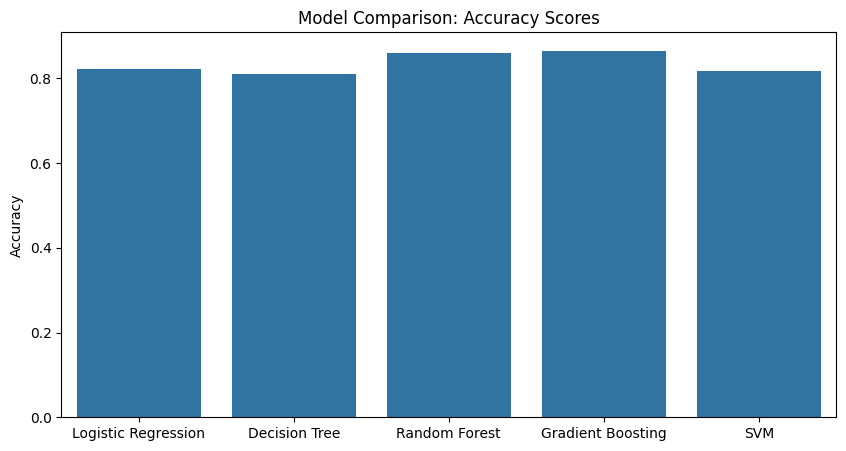

In [9]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading the Dataset
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
data = pd.read_csv(url)

# 3. Data Preprocessing
# Dropping any null values (in this case, there are none based on the description)
# Converting categorical variables to numeric using LabelEncoder

label_enc = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_enc.fit_transform(data[column])

# 4. Feature Scaling
# Apply standard scaling to features such as 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'
scaler = StandardScaler()
data[['Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']] = scaler.fit_transform(data[['Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])

# Separating features and target variable
X = data.drop('Income', axis=1)  # Features
y = data['Income']  # Target (Income)

# 5. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Training and comparing multiple models

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# 7. Evaluating the models

def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dtree, "Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Evaluate Support Vector Machine
evaluate_model(y_test, y_pred_svc, "Support Vector Machine")

# 8. Comparison of models (You can add visualizations or more metrics)
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracy_scores = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_dtree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_svc)
]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()
